### ***Problem03***
---


In [1]:
### Import Library
from google.colab import drive
drive.mount("/content/drive") 
import numpy as np
import pandas as pd
from numpy.random import uniform 
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt
import seaborn as sns 
import random
# df
df = "/content/drive/MyDrive/DS5230_Unsupervised Machine Learning/Assignments/HW02/2gaussian.txt"
df = pd.read_csv(df, sep=" ", header=None) 
df = np.array(df)

Mounted at /content/drive


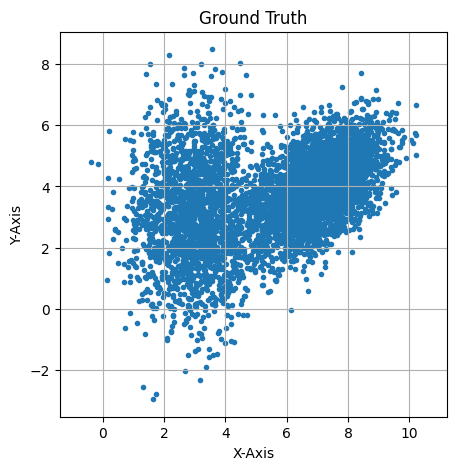

In [ ]:
### EM Algorithm (GMM)
# x, y
df = pd.DataFrame(df) 
df.columns = ["x", "y"]
df = np.array(df)
# Plot 
plt.figure(figsize=(5,5))                                             
plt.scatter(df[:,0], df[:,1], marker=".", color="g")       
plt.axis('equal')                                                                 
plt.xlabel('X-Axis', fontsize=10)                                                 
plt.ylabel('Y-Axis', fontsize=10)                                                 
plt.title('Ground Truth', fontsize=12)                                            
plt.grid()                                                                         
plt.show()

In [ ]:
### EM Algorithm for question A
def em(lis1):
  # E step
  # Set mu and covariance
  m1=lis1[0]
  m2=lis1[1]
  cov1=lis1[2]
  cov2=lis1[3]
  pt1 = multivariate_normal.pdf(df, mean=m1, cov=cov1)
  pt2 = multivariate_normal.pdf(df, mean=m2, cov=cov2)
  w1 = (1/3) * pt1
  w2 = (2/3) * pt2
  # eval = Likelihood 
  eval1 = w1/(w1+w2)
  eval2 = w2/(w1+w2)
  # M step
  num_mu1, din_mu1, num_mu2, din_mu2=0,0,0,0
  # Set mu
  for i in range(0,len(df)):
    num_mu1 += (eval1[i]) * df[i]
    din_mu1 += (eval1[i])
    num_mu2 += eval2[i] * df[i]
    din_mu2 += eval2[i]
  mu1 = num_mu1/din_mu1
  mu2 = num_mu2/din_mu2
  num_s1,din_s1,num_s2,din_s2=0,0,0,0
  # set s
  for i in range(0,len(df)):
    q1 = np.matrix(df[i]-mu1)
    num_s1 += (eval1[i]) * np.dot(q1.T, q1)
    din_s1 += (eval1[i])
    q2 = np.matrix(df[i]-mu2)
    num_s2 += eval2[i] * np.dot(q2.T, q2)
    din_s2 += eval2[i]
  s1 = num_s1/din_s1
  s2 = num_s2/din_s2
  # result
  lis2=[mu1,mu2,s1,s2] 
  return(lis2)

In [ ]:
### Answer A 
# mean_1 [3,3]); cov_1 = [[1,0],[0,3]]; n1=2000 points 
# mean_2 =[7,4]; cov_2 = [[1,0.5],[0.5,1]]; ; n2=4000 points
m1 = [3,3]                                                
m2 = [7,4]                                              
cov1 = [[1, 0], [0, 3]]                                      
cov2 = [[1, 0.5], [0.5, 1]] 
lis1=[m1,m2,cov1,cov2]
result = em(lis1)
result

[array([3.1125151 , 3.03221062]),
 array([7.08728907, 4.02659675]),
 matrix([[ 1.16677101e+00, -2.18711617e-03],
         [-2.18711617e-03,  2.80192587e+00]]),
 matrix([[0.83965182, 0.41481681],
         [0.41481681, 0.95636645]])]

In [ ]:
### EM Algorithm for question B
def em(lis1):
  # E step
  # Set mu and covariance
  m1=lis1[0]
  m2=lis1[1]
  m3=lis1[2]
  cov1=lis1[3]
  cov2=lis1[4]
  cov3=lis1[5]
  pt1 = multivariate_normal.pdf(df, mean=m1, cov=cov1)
  pt2 = multivariate_normal.pdf(df, mean=m2, cov=cov2)
  pt3 = multivariate_normal.pdf(df, mean=m3, cov=cov3)
  w1 = 0.2 * pt1
  w2 = 0.3 * pt2
  w3 = 0.5 * pt3
  eval1 = w1/(w1+w2+w3)
  eval2 = w2/(w1+w2+w3)
  eval3 = w3/(w1+w2+w3)
  # M step
  num_mu1, din_mu1, num_mu2, din_mu2, num_mu3, din_mu3=0,0,0,0,0,0
  # Set mu
  for i in range(0,len(df)):
    num_mu1 += (eval1[i]) * df[i]
    din_mu1 += (eval1[i])
    num_mu2 += eval2[i] * df[i]
    din_mu2 += eval2[i]
    num_mu3 += eval3[i] * df[i]
    din_mu3 += eval3[i]
  mu1 = num_mu1/din_mu1
  mu2 = num_mu2/din_mu2
  mu3 = num_mu3/din_mu3
  num_s1,din_s1,num_s2,din_s2,num_s3,din_s3=0,0,0,0,0,0
  # set s
  for i in range(0,len(df)):
    q1 = np.matrix(df[i]-mu1)
    num_s1 += (eval1[i]) * np.dot(q1.T, q1)
    din_s1 += (eval1[i])
    q2 = np.matrix(df[i]-mu2)
    num_s2 += eval2[i] * np.dot(q2.T, q2)
    din_s2 += eval2[i]
    q3 = np.matrix(df[i]-mu3)
    num_s3 += eval3[i] * np.dot(q3.T, q2)
    din_s3 += eval3[i]
  s1 = num_s1/din_s1
  s2 = num_s2/din_s2
  s3 = num_s3/din_s3
  # result
  lis2=[mu1,mu2,mu3,s1,s2,s3] 
  return(lis2)

In [ ]:
### B
# mean_1 = [3,3] ; cov_1 = [[1,0],[0,3]]; n1=2000
# mean_2 = [7,4] ; cov_2 = [[1,0.5],[0.5,1]] ; n2=3000
# mean_3 = [5,7] ; cov_3 = [[1,0.2],[0.2,1]]    ); n3=5000
m1 = [3,3]  
m2 = [7,4]
m3 = [5, 7]
cov1 = [[1,0],[0,3]]
cov2 = [[1,0.5],[0.5,1]]
cov3 = [[1,0.2],[0.2,1]]
lis1 = [m1,m2,m3,cov1,cov2,cov3] 
result = em(lis1)
result

[array([2.95011797, 2.76711409]),
 array([7.03674111, 3.95678509]),
 array([4.49357944, 5.59325638]),
 matrix([[ 1.03762306, -0.14479565],
         [-0.14479565,  2.32570701]]),
 matrix([[0.95850939, 0.50836737],
         [0.50836737, 0.95134501]]),
 matrix([[ 2.37780831, -0.14890869],
         [-0.14890869,  0.80799772]])]